In [1]:
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt

## example of overfitting

we generate 12 data points from the function 

sin(2$\pi$x),    

where $x\in[0,1]$, while adding a Gaussian noise, $\epsilon\sim {\cal N}(0,0.3)$

In [33]:
N = 12 # number of points                                                                                                                                                                                   
def func(x):
    return math.sin(2*np.pi*x)

xmin = 0
xmax = 1.
np.random.seed(1231)
x = np.random.rand(N)
yclean = []
for i in range(N):
    yclean.append(func(x[i]) )

mu=0.
sigma=0.3
noise = st.norm.rvs(mu, sigma, size = N)
y = yclean + noise

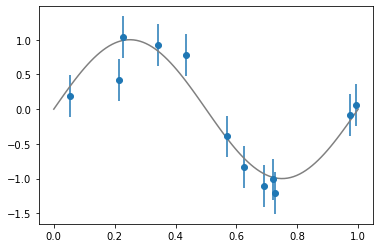

In [34]:
func_arr=[]
xs=np.linspace(0,1,100)
for xi in xs:
    func_arr.append(func(xi))

plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.plot(xs,func_arr,color='gray')
plt.show()

we use a polynomial model, where the prediction is: 

$f(x,{\vec w}) = {\vec w}^T \cdot \vec\phi(x) $,

where   $\vec\phi(x)=\{1,x,x^2,...,x^M\}^T$, with $M$ the order of the polynomial


In [35]:
def pred(x,w):
    '''
    x: vector of 1-D inputs
    w: vector of weights, dimension M+1 
    '''
    Mp1=len(w)
    output=[]
    for xi in x:
        phi=[]
        for h in range(1,Mp1):
            phi.append(xi**h)
        phi=np.hstack((1,phi))
        output.append(np.transpose(w).dot(phi))
    return output

In [36]:
# lets check this function
w_check = [1.,1.,3]
pred(x,w_check)

[2.0026269698012618,
 4.8162786383279625,
 2.79249166275862,
 1.6896288986889385,
 3.1253192595884247,
 1.353364705474736,
 1.0617023516053237,
 4.951074895434512,
 3.277569382398193,
 2.533592892486041,
 3.3117239688566467,
 1.384690422843589]

In [39]:
# reshape the input for convenience later
x=np.array(x).reshape((len(x),1))

fitting a degree 3 polynomial

${\bf w}_{\rm MLE} = (\Phi \Phi^T)^{-1} \Phi^T {\bf y} $

w_MLE =  [[ 1.00700773e+02]
 [-3.56338725e+03]
 [ 4.27654486e+04]
 [-2.58672305e+05]
 [ 9.10074433e+05]
 [-1.97173950e+06]
 [ 2.65342786e+06]
 [-2.13254695e+06]
 [ 8.98402589e+05]
 [-1.14885940e+05]
 [-2.33631652e+04]]


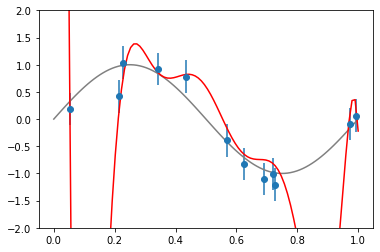

In [40]:
M=10 # degree of the polynomial
Phi=np.ones(N).reshape((-1,1))
for h in range(1,M+1):
    Phi=np.hstack((Phi,x**h))

w_MLE=np.linalg.inv(np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y)
print('w_MLE = ',w_MLE.reshape(-1,1))

pred_arr=pred(xs,w_MLE)

#plt.scatter(x,y)
plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.plot(xs,func_arr,color='gray')
plt.plot(xs,pred_arr,color='red')
plt.ylim(-2,2)
plt.show()

fitting a degree 9 polynomial

w_MLE =  [[ 1.04167383e+02]
 [-3.67911720e+03]
 [ 4.43965319e+04]
 [-2.70862935e+05]
 [ 9.64851150e+05]
 [-2.12922495e+06]
 [ 2.95009369e+06]
 [-2.49682671e+06]
 [ 1.17899799e+06]
 [-2.37850184e+05]]


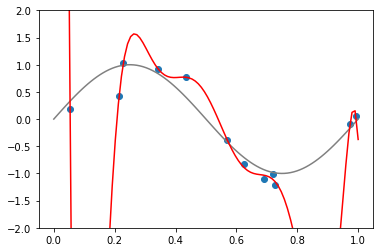

In [14]:
M=9 # degree of the polynomial
Phi=np.ones(N).reshape((-1,1))
for h in range(1,M+1):
    Phi=np.hstack((Phi,x**h))

w_MLE=np.linalg.inv(np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y)
print('w_MLE = ',w_MLE.reshape(-1,1))

pred_arr=pred(xs,w_MLE)

plt.scatter(x,y)
plt.plot(xs,func_arr,color='gray')
plt.plot(xs,pred_arr,color='red')
plt.ylim(-2,2)
plt.show()

checking training error as a function of the order of the polynomial

In [15]:
for m in range(1,10):
    Phi=np.ones(N).reshape((-1,1))
    for h in range(1,m+1):
        Phi=np.hstack((Phi,x**h))
    w_MLE=np.linalg.inv(np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y)
    # computing error function
    err = np.sum((y-pred(x.flatten(),w_MLE))**2)
    print('M=',m,' error = ',err)

M= 1  error =  4.973068318951922
M= 2  error =  4.377259498511365
M= 3  error =  0.581104718808488
M= 4  error =  0.38805038655651153
M= 5  error =  0.2064341000327291
M= 6  error =  0.19874928957409513
M= 7  error =  0.19538180946406675
M= 8  error =  0.16089216410005167
M= 9  error =  0.02434491051334109


## overfitting control

### training-test procedure

In [19]:
len(x)

12

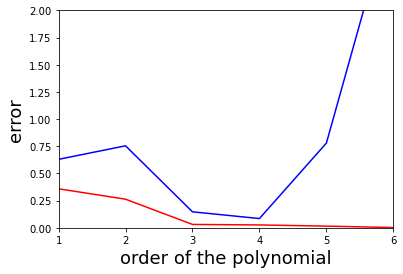

In [16]:
test_size = int(0.4*len(x))
x_test = x[:test_size]
x_train = x[test_size:]
y_test = y[:test_size]
y_train = y[test_size:]

arr_testerr=[]
arr_trainerr=[]
for m in range(1,10):
    Phi=np.ones(len(x_train)).reshape((-1,1))
    for h in range(1,m+1):
        Phi=np.hstack((Phi,x_train**h))
    w_MLE=np.linalg.inv(np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y_train)
    # computing error function
    arr_trainerr.append(np.mean((y_train-pred(x_train.flatten(),w_MLE))**2))
    arr_testerr.append(np.mean((y_test-pred(x_test.flatten(),w_MLE))**2))
    #print('M=',m,' train error = ',arr_trainerr[-1],', test error = ',arr_testerr[-1])

maxis=np.linspace(1,9,9)
plt.plot(maxis,arr_testerr,color='blue')
plt.plot(maxis,arr_trainerr,color='red')
plt.ylim(0,2)
plt.xlim(1,6)
plt.xlabel('order of the polynomial',size=18)
plt.ylabel('error',size=18)
plt.show()

##  <font color='red'> implement K=5 cross validation for the above example </font>

### regularization procedure (Ridge regression)

In [49]:
M=10 # degree of the polynomial
Phi=np.ones(N).reshape((-1,1))
for h in range(1,M+1):
    Phi=np.hstack((Phi,x**h))

alpha=1.
reg=alpha*np.identity(M+1)
reg[0,0]=0 
w_ridge=np.linalg.inv(np.transpose(Phi).dot(Phi)+reg).dot(np.transpose(Phi)).dot(y)

In [50]:
w_ridge

array([ 4.26130943e-01, -6.41989730e-01, -5.82284255e-01, -3.65773177e-01,
       -1.60466667e-01, -5.88953553e-04,  1.15618000e-01,  1.97389497e-01,
        2.53774476e-01,  2.91963993e-01,  3.17278576e-01])

In [52]:
predridge_arr=pred(xs,w_ridge)

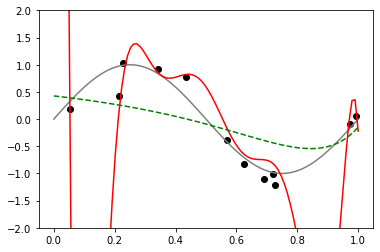

In [53]:
plt.scatter(x,y,color='black')
plt.plot(xs,func_arr,color='gray')
plt.plot(xs,pred_arr,color='red')
plt.plot(xs,predridge_arr,color='green',ls='--')
plt.ylim(-2,2)
plt.show()

### <font color='red'>play with the value of alpha. What happens if alpha tends to zero (e.g. 10^-15 or so)? What happens instead if alpha is too large (e.g. 0.1) ? Plot the correspoding fitting curves </font>

In [54]:
(7/13)*(30/49)+(6/13)*(11/18.)

0.6117216117216118

In [56]:
12/49

0.24489795918367346